In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv("./data/accounts_summary.csv")


## Odvozování dalších sloupců
- Podezřelé účty často mají nevyvážený tok (příliš mnoho odchozích vs. příchozích transakcí).
- Také mají vyšší volatilitu (velké rozdíly mezi částkami), nebo velmi vysoké částky s nízkou četností.

In [3]:

# Výpočet čistého toku
df["Net_Flow"] = df["Sum_In"] - df["Sum_Out"]

# Přidáme průměrné hodnoty transakcí a průměrnou směrodatnou odchylku (volatilitu)
df["In_per_Transaction"] = df["Sum_In"] / df["Count_In"]
df["Out_per_Transaction"] = df["Sum_Out"] / df["Count_Out"]
df["Avg_SD"] = (df["SD_In"] + df["SD_Out"]) / 2

## Podezřelé účty

/var/folders/69/wt5shy0s3hd876vm1pzlrtbc0000gn/T/ipykernel_33949/3353122560.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


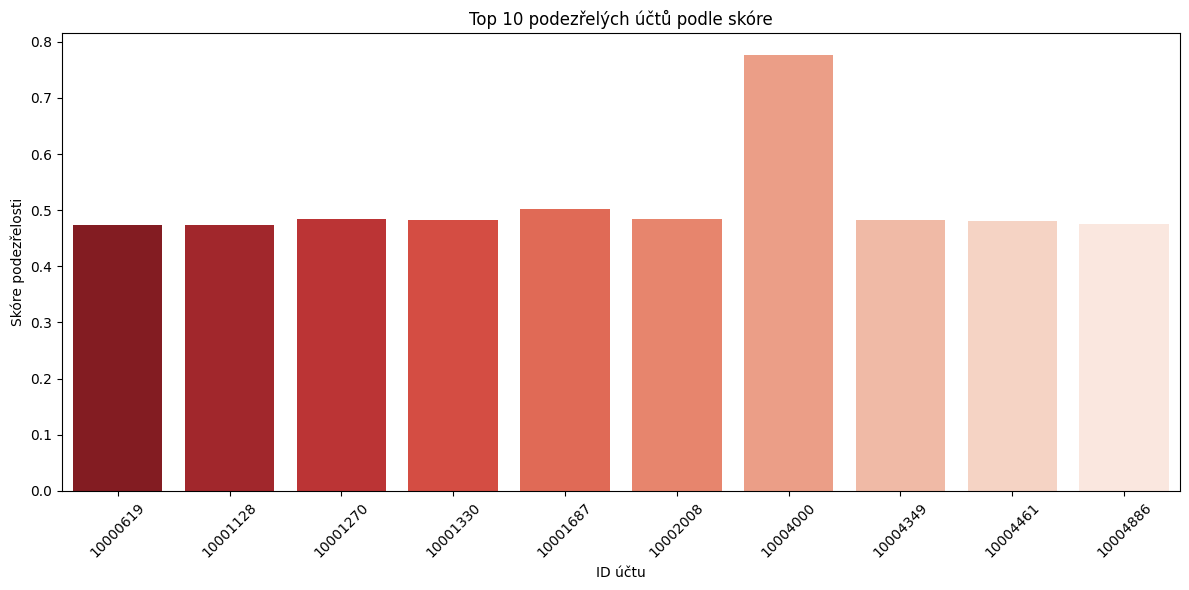

In [4]:
# Skóre je založené na absolutních hodnotách zvolených indikátorů podezřelého chování
suspicious_features = [
    "Net_Flow", "SD_In", "SD_Out",
    "In_per_Transaction", "Out_per_Transaction",
    "Max_In", "Max_Out", "Min_In", "Min_Out"
]

scaler = MinMaxScaler()
df["Suspicion_Score"] = scaler.fit_transform(df[suspicious_features].abs()).mean(axis=1)

top_suspicious = df.sort_values("Suspicion_Score", ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(
    x="Account",
    y="Suspicion_Score",
    data=top_suspicious.sort_values("Suspicion_Score", ascending=False),
    palette="Reds_r"
)
plt.title("Top 10 podezřelých účtů podle skóre")
plt.ylabel("Skóre podezřelosti")
plt.xlabel("ID účtu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Vizualizace chování
- ✅ Blízko nule – účet má přirozené vyrovnané příjmy a výdaje (např. běžný účet).
- ❌ Daleko vpravo – účet má přebytek příjmů → možná „ukládání“ peněz.
- ❌ Daleko vlevo – účet má přebytek výdajů → možná „čisticí“ aktivita nebo přesun prostředků jinam.

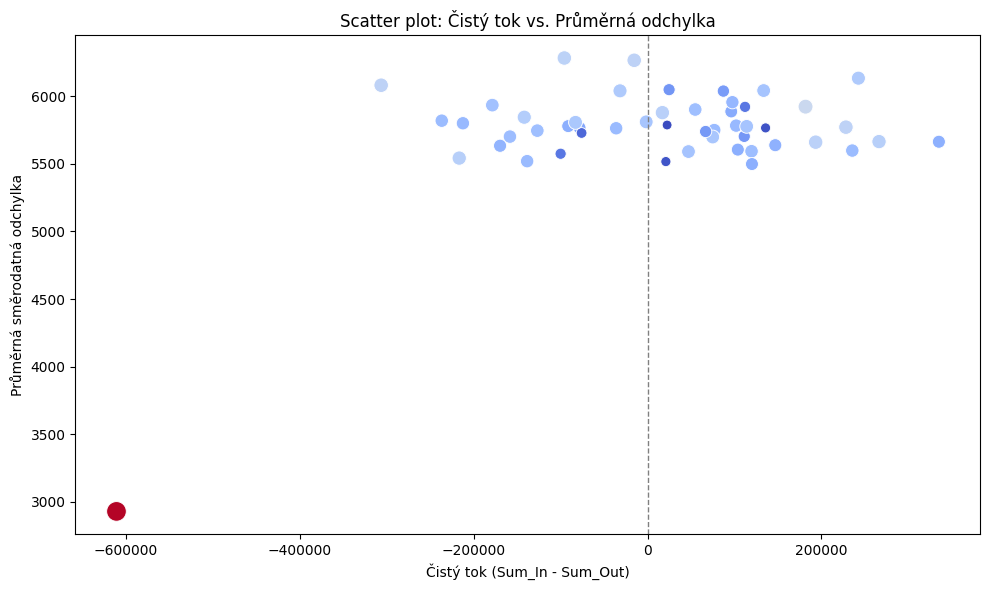

In [8]:
# Vizualizuje, které účty mají extrémní nerovnováhu mezi příjmem a výdajem i volatilitu
#Účty daleko od středu (vysoký tok nebo rozptyl) jsou podezřelé.
#Barva/velikost ukazuje skóre podezřelosti.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Net_Flow",
    y="Avg_SD",
    hue="Suspicion_Score",
    palette="coolwarm",
    size="Suspicion_Score",
    sizes=(50, 200),
    legend=False
)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Scatter plot: Čistý tok vs. Průměrná odchylka")
plt.xlabel("Čistý tok (Sum_In - Sum_Out)")
plt.ylabel("Průměrná směrodatná odchylka")
plt.tight_layout()
plt.show()


